In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from general import GeneralUtil as util
import matplotlib.pyplot as plt

import numpy as np
import statsmodels.api as sm
pd.options.plotting.backend = 'plotly'


In [2]:
df = pd.read_csv('../data/players_22.csv')
util.print("Original DF", header=True, color='blue')
util.print(df)

# -----------
# Original DF
# -----------


/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_19054/1887081563.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

# EDA

In [4]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True, minimal=True)
# show in notebook
# export to html
profile.to_file("../reports/fifa_explore.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Visualize the missing values in the dataset
fig = px.bar(df.isnull().sum().sort_values(ascending=False), 
             title='Missing Values', 
             labels={'index':'Feature', 'value':'Missing Values Count'})
fig.show()

In [21]:
# How players from each country are there?
players_origin = df['nationality_name'].value_counts()[:15]

fix = px.pie(players_origin, players_origin.index, players_origin.values, color_discrete_sequence=px.colors.sequential.Turbo)
fix.update_traces(textposition='outside', textinfo='percent+label')
fix.update_layout(title_text='Players from each country')
fix.show()

In [33]:
# How players from each club are there?
players_club = df['club_name'].value_counts().reset_index().rename(columns={'index': 'club_name', 'club_name': 'count'})

fig = px.bar(players_club, x='club_name', y='count', color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_layout(title_text='Players from each club')
fig.show()


In [37]:
# Who are the players with the maximum potential, and maximum overall performance?
max_potential = df.loc[df['potential'].idxmax()][3]
max_overall = df.loc[df['overall'].idxmax()][3]

print(f"Player with maximum potential: {max_potential}")
print(f"Player with maximum overall: {max_overall}")

Player with maximum potential: Kylian Mbappé Lottin
Player with maximum overall: Lionel Andrés Messi Cuccittini


In [47]:
# Who is the most expensive player?
max_value = df.loc[df['wage_eur'].idxmax()][3]
print(f"Most expensive player: {max_value}")

# Stats of the most expensive player
max_value_stats = df.loc[df['wage_eur'].idxmax()][['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur']]
print(max_value_stats)

Most expensive player: Kevin De Bruyne
age                   30
height_cm            181
weight_kg             70
overall               91
potential             91
value_eur    125500000.0
wage_eur        350000.0
Name: 4, dtype: object


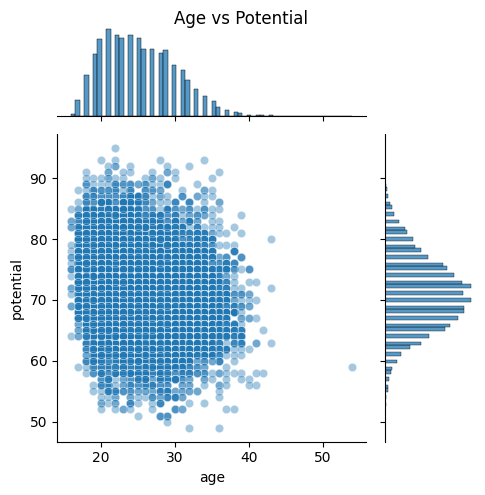

In [62]:
%matplotlib inline
# Age against overall performance shown in a joint plot
fig = sns.jointplot(x='age', y='potential', data=df, height=5, ratio=3, alpha=0.4)
fig.fig.suptitle('Age vs Potential')
fig.fig.subplots_adjust(top=0.95)
plt.show()


/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_19054/1217452107.py:12: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



ValueError: num must be 1 <= num <= 30, not 31

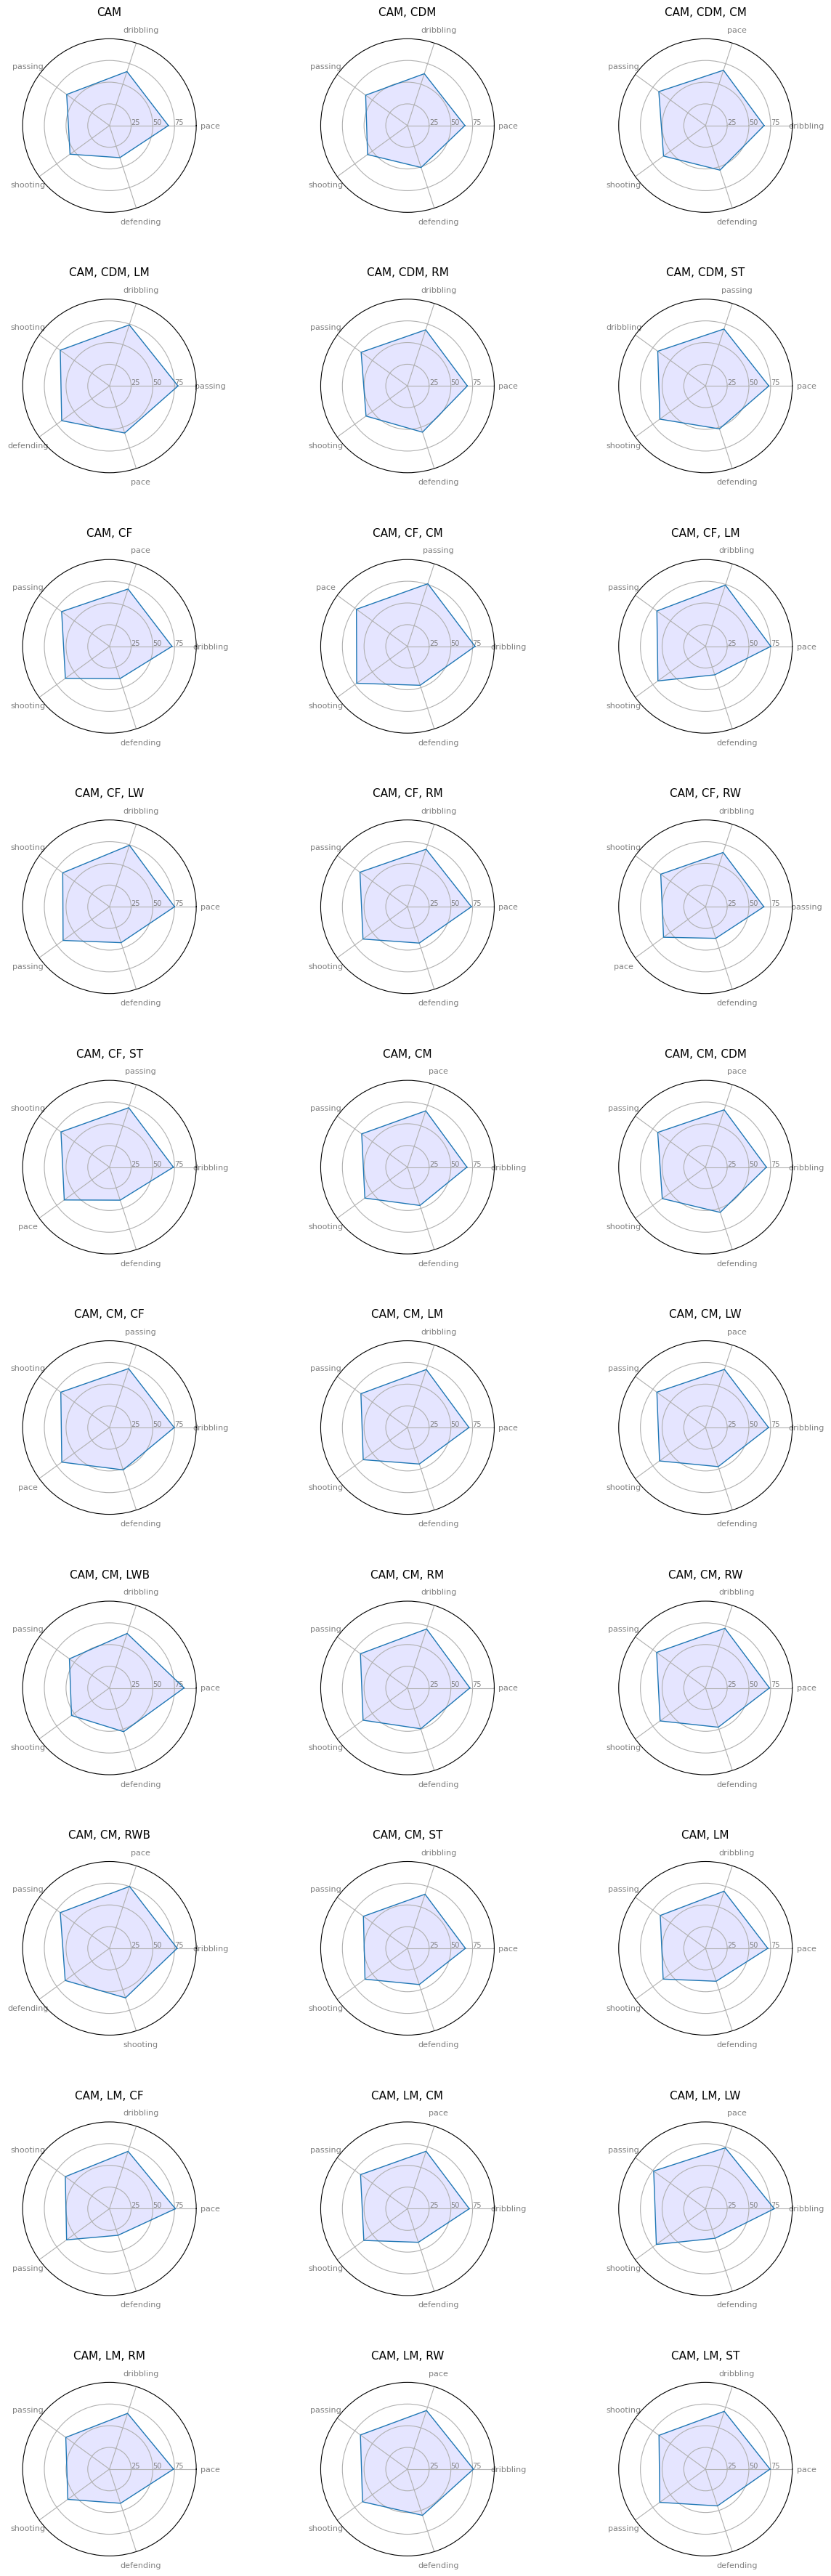

In [73]:
from math import pi
player_features = (
'pace',
'shooting',
 'passing',
 'dribbling',
 'defending',
)

idx = 1
plt.figure(figsize=(15, 45))
for position_name, features in df.groupby(df['player_positions'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))

    # number of variable
    categories = top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25, 50, 75], ["25", "50", "75"], color="grey", size=7)
    plt.ylim(0, 100)

    plt.subplots_adjust(hspace=0.5)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(position_name, size=11, y=1.1)

    idx += 1


In [91]:
feats = [feat.lower() for feat in df.columns.tolist() if type(feat) == str and 'speed' in feat.lower()]
feats

['movement_sprint_speed', 'goalkeeping_speed']

/Users/rumiallbert/opt/anaconda3/envs/fifa/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide



Text(0.5, 1.0, 'Sprint Speed vs Age')

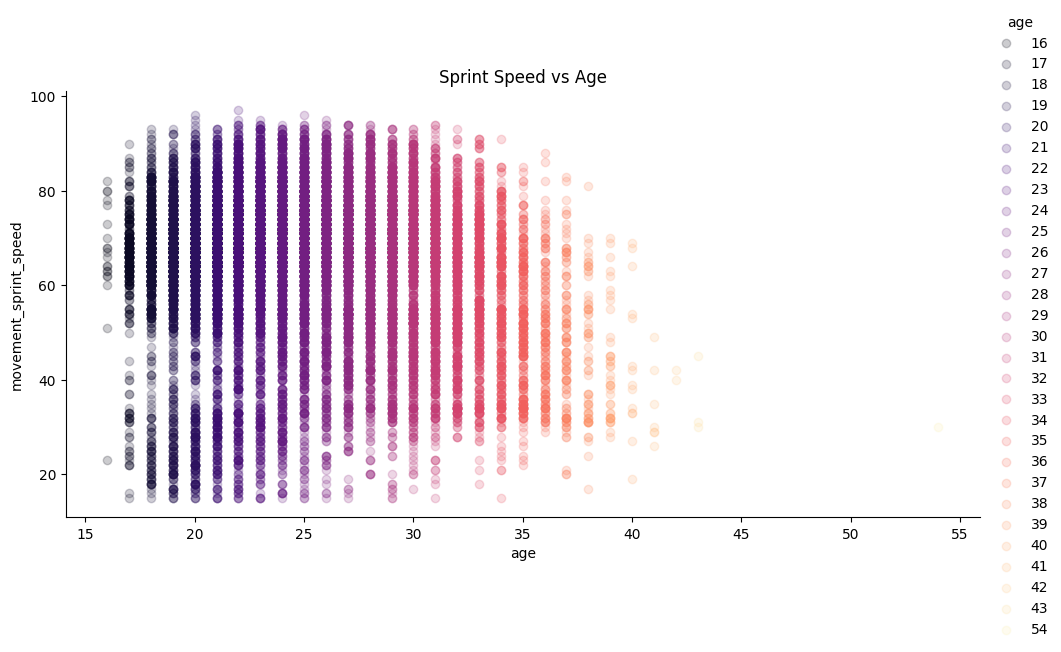

In [107]:
sns.lmplot(x='age', y='movement_sprint_speed', data=df,
           hue='age', lowess=True, height=5, aspect=2, palette='magma',  scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
plt.title('Sprint Speed vs Age')


Text(0.5, 1.0, 'Overall vs Potential')

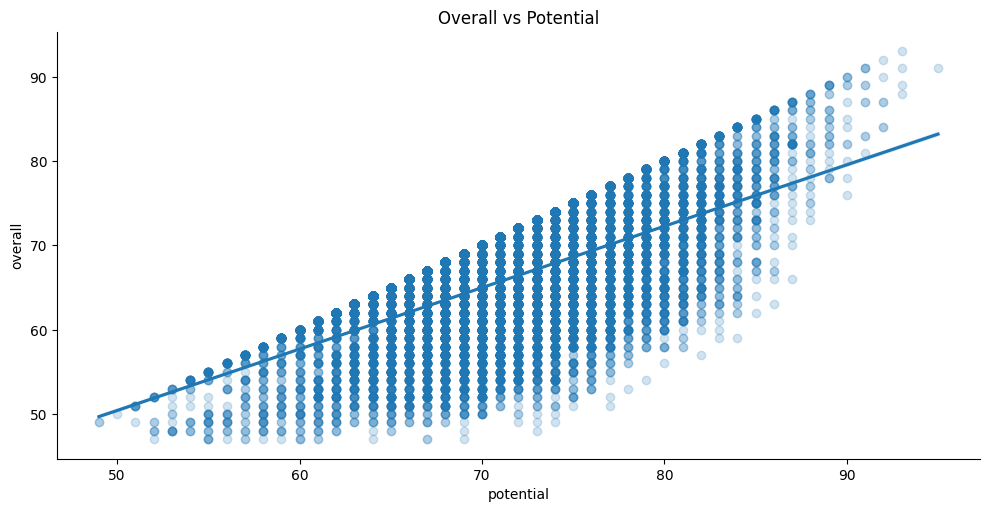

In [99]:
# Plot the linera regression of the overall performance against the potential
sns.lmplot(x='potential', y='overall', data=df, fit_reg=True, height=5, aspect=2, scatter_kws={'alpha':0.2})
plt.title('Overall vs Potential')

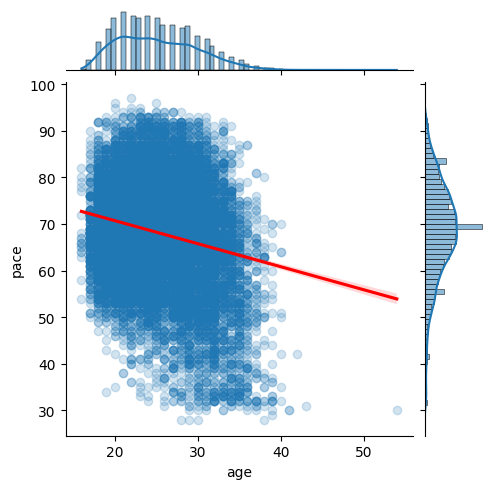

In [115]:
performance_age = df[['age', 'pace', 'shooting',
                      'passing', 'dribbling', 'defending', 'physic']]

sns.jointplot(x='age', y='pace', data=performance_age, kind='reg', height=5, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})

# Data Cleaning 

In soccer, positions are typically referred to using abbreviations. Here are some common ones:

  - GK: Goalkeeper
  - CB: Center back
  - LB: Left back
  - RB: Right back
  - LW: Left winger
  - RW: Right winger
  - CM: Center midfielder
  - CDM: Center defensive midfielder
  - CAM: Center attacking midfielder
  - ST: Striker

In [215]:
unwated_columns = [
    'sofifa_id',
    'player_url',
    'dob',
    'long_name',
    'short_name',
    # 'player_positions',
    'league_name',
    'nationality_name',
    'club_contract_valid_until',
    'club_position',
    'club_loaned_from',
    'club_joined',
    'work_rate',
    'player_tags',
    'player_traits',
    'player_face_url',
    'body_type',
    'nation_position',	
    'club_logo_url',
    'club_flag_url',	
    'nation_logo_url',	
    'nation_flag_url',
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb',
    'gk'
]

fifa_df = df.drop(unwated_columns, axis=1).copy()

# Rename the columns to make it more readable
fifa_df.rename(columns={'wage_eur': 'wage', 'value_eur': 'value', 'release_clause_eur': 'release_clause', 'club_name':'club'}, inplace=True)

# Change boolean columns to either 0 or 1 
fifa_df['real_face'] = fifa_df['real_face'].apply(lambda x: 1 if x == "Yes" else 0)

# Change the player positions to a list, and only use the firsr position
fifa_df['player_positions'] = fifa_df['player_positions'].apply(lambda x: x.split(',')[0])

# Simplify the player positions
def simplify_position(position):
    if position in ['GK']:
        return 'GK'
    elif position in ['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB']:
        return 'DEF'
    elif position in ['CDM', 'CM', 'CAM', 'LM', 'RM', 'LW', 'RW']:
        return 'MID'
    elif position in ['ST', 'CF', 'LF', 'RF']:
        return 'FWD'
    else:
        return position

fifa_df['player_positions'] = fifa_df['player_positions'].apply(simplify_position)

# Change club name to 1 if it belongs to the top 10 clubs, and 0 otherwise
top_clubs = fifa_df.groupby('club')['value'].sum(
).sort_values(ascending=False).head(15).index.tolist()
def change_club_name(club_name):
    if club_name in top_clubs:
        return 1
    else:
        return 0

fifa_df['club'] = fifa_df['club'].apply(change_club_name)

# Check for infinate values
fifa_df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Modeling with dummy variables

In [216]:
util.print(fifa_df)

,player_positions,overall,potential,value,wage,age,height_cm,weight_kg,club_team_id,club,league_level,club_jersey_number,nationality_id,nation_team_id,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,real_face,release_clause,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,MID,93,93,78000000.0,320000.0,34,170,72,73.0,1,1.0,30.0,52,1369.0,10.0,Left,4,4,5,1,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,FWD,92,92,119500000.0,270000.0,32,185,81,21.0,1,1.0,9.0,37,1353.0,9.0,Right,4,4,5,1,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,FWD,91,91,45000000.0,270000.0,36,187,83,11.0,1,1.0,7.0,38,1354.0,7.0,Right,4,5,5,1,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,MID,91,91,129000000.0,270000.0,29,175,68,73.0,1,1.0,10.0,54,NaN,NaN,Right,5,5,5,1,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,MID,91,91,125500000.0,350000.0,30,181,70,10.0,1,1.0,17.0,7,1325.0,7.0,Right,5,4,4,1,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,MID,47,52,70000.0,1000.0,22,180,64,112541.0,0,1.0,36.0,155,NaN,NaN,Right,3,2,1,0,114000.0,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN
19235,MID,47,59,110000.0,500.0,19,175,70,445.0,0,1.0,27.0,25,NaN,NaN,Right,3,2,1,0,193000.0,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN
19236,MID,47,55,100000.0,500.0,21,178,72,111131.0,0,1.0,31.0,25,NaN,NaN,Right,3,2,1,0,175000.0,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN
19237,FWD,47,60,110000.0,500.0,19,173,66,111131.0,0,1.0,12.0,25,NaN,NaN,Right,3,2,1,0,239000.0,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN


In [231]:
from sklearn.impute import SimpleImputer
model_df = fifa_df.copy()
# Create dummy variables for the categorical columns
model_df = pd.get_dummies(model_df, drop_first=True)

# Impute the missing values with mean
imputer = SimpleImputer(strategy='mean')
model_df = pd.DataFrame(imputer.fit_transform(model_df), columns=model_df.columns)
model_df

,overall,potential,value,wage,age,height_cm,weight_kg,club_team_id,club,league_level,club_jersey_number,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,real_face,release_clause,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_positions_FWD,player_positions_GK,player_positions_MID,preferred_foot_Right
0,93.0,93.0,78000000.0,320000.0,34.0,170.0,72.0,73.0,1.0,1.0,30.0,52.0,1369.000000,10.000000,4.0,4.0,5.0,1.0,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,36.439962,0.0,0.0,1.0,0.0
1,92.0,92.0,119500000.0,270000.0,32.0,185.0,81.0,21.0,1.0,1.0,9.0,37.0,1353.000000,9.000000,4.0,4.0,5.0,1.0,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,36.439962,1.0,0.0,0.0,1.0
2,91.0,91.0,45000000.0,270000.0,36.0,187.0,83.0,11.0,1.0,1.0,7.0,38.0,1354.000000,7.000000,4.0,5.0,5.0,1.0,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,36.439962,1.0,0.0,0.0,1.0
3,91.0,91.0,129000000.0,270000.0,29.0,175.0,68.0,73.0,1.0,1.0,10.0,54.0,14480.848485,12.567852,5.0,5.0,5.0,1.0,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,36.439962,0.0,0.0,1.0,1.0
4,91.0,91.0,125500000.0,350000.0,30.0,181.0,70.0,10.0,1.0,1.0,17.0,7.0,1325.000000,7.000000,5.0,4.0,4.0,1.0,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,36.439962,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47.0,52.0,70000.0,1000.0,22.0,180.0,64.0,112541.0,0.0,1.0,36.0,155.0,14480.848485,12.567852,3.0,2.0,1.0,0.0,114000.0,58.0,35.0,46.0,48.0,42.0,49.0,46.0,32.0,48.0,50.0,30.0,45.0,33.0,38.0,48.0,49.0,56.0,60.0,55.0,53.0,70.0,46.0,62.0,51.0,46.0,30.0,52.0,42.0,38.0,43.0,42.0,37.0,38.0,43.0,48.0,6.0,10.0,5.0,15.0,13.0,36.439962,0.0,0.0,1.0,1.0
19235,47.0,59.0,110000.0,500.0,19.0,175.0,70.0,445.0,0.0,1.0,27.0,25.0,14480.848485,12.567852,3.0,2.0,1.0,0.0,193000.0,59.0,39.0,50.0,46.0,41.0,51.0,54.0,33.0,46.0,51.0,32.0,41.0,53.0,31.0,50.0,42.0,60.0,58.0,64.0,49.0,69.0,49.0,47.0,63.0,47.0,38.0,49.0,39.0,51.0,49.0,44.0,47.0,37.0,44.0,47.0,11.0,12.0,6.0,8.0,10.0,36.439962,0.0,0.0,1.0,1.0
19236,47.0,55.0,100000.0,500.0,21.0,178.0,72.0,111131.0,0.0,1.0,31.0,25.0,14480.848485,12.567852,3.0,2.0,1.0,0.0,175000.0,60.0,37.0,45.0,49.0,41.0,52.0,39.0,32.0,43.0,49.0,37.0,47.0,37.0,37.0,49.0,49.0,60.0,60.0,58.0,46.0,59.0,50.0,57.0,56.0,50.0,34.0,51.0,38.0,45.0,46.0,39.

In [232]:
# Prepare X and y
X, y = model_df.drop(['wage'], axis=1).copy(), model_df['wage'].copy()


### Modeling with OLS

In [264]:
X = sm.add_constant(X)
fit = sm.OLS(y, X).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1083.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:08:04   Log-Likelihood:            -2.0270e+05
No. Observations:               19239   AIC:                         4.055e+05
Df Residuals:                   19175   BIC:                         4.060e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -3.153e+04   6982.020     -4.516      0.000   -4.52e+04   -1.78e+04
overall                       557.7913     39.622     14.078      0.000     480.128     635.454
potential                    -149.3899     26.746     -5.585      0.000    -201.815     -96.965
value                           0.0014    4.8e-05     29.794      0.000       0.001       0.002
age                           -22.7653     31.554     -0.721      0.471     -84.615      39.084
height_cm                      31.7661     19.542      1.626      0.104      -6.538      70.070
weight_kg                      -0.4475     16.816     -0.027      0.979     -33.408      32.513
club_team_id                   -0.0192      0.001    -13.972      0.000      -0.022      -0.017
club                         2.511e+04    507.157     49.512      0.000    2.41e+04    2.61e+04
league_level                 -163.2194     98.358     -1.659      0.097    -356.009      29.570
club_jersey_number              6.9235      3.876      1.786      0.074      -0.673      14.520
nationality_id                  6.6225      1.505      4.400      0.000       3.672       9.573
nation_team_id                 -0.0336      0.009     -3.562      0.000      -0.052      -0.015
nation_jersey_number         -335.4971     47.368     -7.083      0.000    -428.343    -242.652
weak_foot                    -135.3751    108.619     -1.246      0.213    -348.278      77.527
skill_moves                   113.1402    160.625      0.704      0.481    -201.700     427.980
international_reputation     8349.3659    254.708     32.780      0.000    7850.116    8848.616
real_face                    5261.4862    248.731     21.153      0.000    4773.952    5749.020
release_clause              -9.193e-05   2.41e-05     -3.814      0.000      -0.000   -4.47e-05
pace                           61.1667    159.894      0.383      0.702    -252.239     374.572
shooting                      134.1162     89.159      1.504      0.133     -40.644     308.876
passing                       -77.5978     51.556     -1.505      0.132    -178.651      23.455
dribbling                      17.7599     73.936      0.240      0.810    -127.161     162.681
defending                      -6.8463     83.716     -0.082      0.935    -170.937     157.245
physic                        -13.0924     36.002     -0.364      0.716     -83.659      57.474
attacking_crossing             34.7146     14.353      2.419      0.016       6.581      62.848
attacking_finishing           -80.2453     41.246     -1.946      0.052    -161.092       0.601
attacking_heading_accuracy     39.7502     13.344      2.979      0.003      13.594      65.907
attacking_short_passing       -12.0590     21.974     -0.549      0.583     -55.131      31.013
attacking_v

In [235]:
# Let's test for collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,11272.052626,const
1,17.183189,overall
2,6.126812,potential
3,30.764543,value
4,5.190410,age
...,...,...
59,75.626501,goalkeeping_speed
60,5.541692,player_positions_FWD
61,934.494250,player_positions_GK
62,4.397008,player_positions_MID


Since the VIF values are greater than 10, there is collinearity between the values.

#### Backward Elimination

In [296]:
# Let's create a backward elimination function that will remove the features with the highest p-values, and store the results of AIC, BIC and R-squared in a dataframe
def backwardElimination(X, y, alpha=0.05):
    model_results = pd.DataFrame(columns=['Model', 'AIC', 'BIC', 'R-squared', 'features'])
    cols = list(X.columns)
    pmax = 1
    model_num = 1
    while (len(cols) > 0):
        p = []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        # Add AIC BIC And R-squared to the model_results dataframe
        model_results.loc[len(model_results)] = [f'model {model_num}: {len(cols)} feat', model.aic, model.bic, model.rsquared, cols]
        model_num += 1
        p = pd.Series(model.pvalues.values[0:], index = cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax > alpha):
            cols.remove(feature_with_p_max)
        else:
            break
    included = cols

    return included, model_results

selected_features_BE, model_results_BE = backwardElimination(X, y)
print(selected_features_BE)
model_results_BE


['const', 'overall', 'potential', 'value', 'club_team_id', 'club', 'club_jersey_number', 'nationality_id', 'nation_team_id', 'nation_jersey_number', 'international_reputation', 'real_face', 'release_clause', 'shooting', 'attacking_finishing', 'attacking_heading_accuracy', 'power_shot_power', 'power_stamina', 'power_strength', 'power_long_shots', 'defending_standing_tackle', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'player_positions_FWD']


,Model,AIC,BIC,R-squared,features
0,model 1: 64 feat,405519.609066,406022.949530,0.780539,"[const, overall, potential, value, club_team_i..."
1,model 2: 63 feat,405517.609777,406013.085546,0.780539,"[const, overall, potential, value, club_team_i..."
2,model 3: 62 feat,405515.613624,406003.224699,0.780539,"[const, overall, potential, value, club_team_i..."
3,model 4: 61 feat,405513.618876,405993.365256,0.780539,"[const, overall, potential, value, club_team_i..."
4,model 5: 60 feat,405511.630742,405983.512427,0.780539,"[const, overall, potential, value, club_team_i..."
...,...,...,...,...,...
36,model 37: 28 feat,405482.483300,405702.694753,0.780141,"[const, overall, potential, value, club_team_i..."
37,model 38: 27 feat,405483.361703,405695.708461,0.780108,"[const, overall, potential, value, club_team_i..."
38,model 39: 26 feat,405484.252500,405688.734564,0.780075,"[const, overall, potential, value, club_team_i..."
39,model 40: 25 feat,405484.985945,405681.603314,0.780044,"[const, overall, potential, value, club_team_i..."


In [286]:
px.bar(model_results_BE, x='Model', y='R-squared', title='R-squared for each model', barmode='group')

In [287]:
px.bar(model_results_BE, x='Model', y=[
       'AIC', 'BIC'], title='AIC & BIC for each model', barmode='group')


Backward elimination didn't really work, as it's not clear which model is the best. Let's try forward elimination.

#### Forward Elimination

In [298]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Let's create a forward elimination function that will remove the features with the highest p-values, and store the results of AIC, BIC and R-squared in a dataframe
def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    model_results = pd.DataFrame(columns=['Model', 'AIC', 'BIC', 'R-squared', 'features'])
    initial_list = []
    included = list(initial_list)
    model_num = 1
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
            model_results.loc[len(model_results)] = [
                f'model {model_num}: {len(included)} feat', model.aic, model.bic, model.rsquared, included+[new_column]]
            model_num+1
            
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        
        if best_pval < threshold_in:
            # get the feature with the lowest p-value
            best_feature = new_pval.idxmin()
            # get the best feature and add it to the list
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add with p-value {best_pval:.3f}: {best_feature}')

        if not changed:
            break

    return included, model_results

selected_features_FR, model_results_FR = forward_regression(X, y)
print(selected_features_FR)
model_results_FR


Add with p-value 0.000: power_shot_power
Add with p-value 0.000: club_team_id
Add with p-value 0.000: international_reputation
Add with p-value 0.000: physic
Add with p-value 0.000: goalkeeping_speed
Add with p-value 0.000: club
Add with p-value 0.000: value
Add with p-value 0.000: real_face
Add with p-value 0.000: const
Add with p-value 0.000: overall
Add with p-value 0.000: potential
Add with p-value 0.000: nation_jersey_number
Add with p-value 0.000: attacking_heading_accuracy
Add with p-value 0.000: nationality_id
Add with p-value 0.000: player_positions_FWD
Add with p-value 0.000: release_clause
Add with p-value 0.000: power_strength
Add with p-value 0.000: nation_team_id
Add with p-value 0.001: power_stamina
Add with p-value 0.005: passing
Add with p-value 0.026: club_jersey_number
Add with p-value 0.031: goalkeeping_positioning


In [289]:
px.bar(model_results_BE, x='Model', y=[
       'AIC', 'BIC'], title='AIC & BIC for each model', barmode='group', text_auto=True)


In [290]:
px.bar(model_results_BE, x='Model', y=[
       'R-squared'], title='AIC & BIC for each model', barmode='group', text_auto=True)


### Stepwise Elimination

In [291]:
# Let's create a stepwise elimination function that will remove the features with the highest p-values, and store the results of AIC, BIC and R-squared in a dataframe
def stepwise_regression(X, y,
                        initial_list=[],
                        threshold_in=0.05, 
                        threshold_out = 0.05, 
                        verbose=True):
    model_results = pd.DataFrame(columns=['Model', 'AIC', 'BIC', 'R-squared', 'features'])
    included = list(initial_list)
    model_num = 1
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
            model_results.loc[len(model_results)] = [
                f'model {model_num}: {len(included)} feat', model.aic, model.bic, model.rsquared, included+[new_column]]
            model_num+1
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            # get the feature with the lowest p-value
            best_feature = new_pval.idxmin()
            # get the best feature and add it to the list
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add with p-value {best_pval:.3f}: {best_feature}')

        # backward step
        model = sm.OLS(y, pd.DataFrame(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Remove with p-value {worst_pval:.3f}: {worst_feature}')
        if not changed:
            break
        
    return included, model_results

selected_features_SR, model_results_SR = stepwise_regression(X, y)
print(selected_features_SR)
model_results_SR

Add with p-value 0.000: power_shot_power
Add with p-value 0.000: club_team_id
Add with p-value 0.000: international_reputation
Add with p-value 0.000: physic
Add with p-value 0.000: goalkeeping_speed
Remove with p-value 0.090: physic
Add with p-value 0.000: club
Add with p-value 0.000: value
Add with p-value 0.000: real_face
Add with p-value 0.000: const
Add with p-value 0.000: overall
Add with p-value 0.000: potential
Add with p-value 0.000: nation_jersey_number
Add with p-value 0.000: attacking_heading_accuracy
Add with p-value 0.000: nationality_id
Add with p-value 0.000: power_strength
Add with p-value 0.000: player_positions_FWD
Add with p-value 0.000: release_clause
Add with p-value 0.000: nation_team_id
Add with p-value 0.003: movement_agility
Remove with p-value 0.088: goalkeeping_speed
Add with p-value 0.000: passing
Add with p-value 0.023: club_jersey_number
Add with p-value 0.033: attacking_finishing
Add with p-value 0.028: goalkeeping_positioning
Add with p-value 0.000: sho

,Model,AIC,BIC,R-squared
0,model 1: 0 feat,433289.061743,433296.926438,0.230154
1,model 1: 0 feat,436852.091245,436859.955940,0.073523
2,model 1: 0 feat,432958.837964,432966.702659,0.243255
3,model 1: 0 feat,434025.401187,434033.265882,0.200118
4,model 1: 0 feat,434199.512887,434207.377582,0.192846
...,...,...,...,...
1364,model 1: 22 feat,405490.181037,405671.069016,0.779939
1365,model 1: 22 feat,405490.487241,405671.375220,0.779935
1366,model 1: 22 feat,405490.569982,405671.457961,0.779934
1367,model 1: 22 feat,405490.216612,405671.104591,0.779938


## Model Selection

In [293]:
# Let's select the best model based on the lowest AIC and BIC, and the highest R-squared
def best_model(BE, FR, SR):
    best_models = list()
    for model_name, model in zip(['BE', 'FR', 'SR'], [BE, FR, SR]):
        best_model = pd.DataFrame(columns=['Model', 'AIC', 'BIC', 'R-squared'])
        best_model.loc[len(best_model)] = [
            f'Best model from {model_name}', min(model['AIC']), min(model['BIC']), max(model['R-squared'])]
        best_models.append(best_model)
    best_models = pd.concat(best_models)
    best_models = best_models.reset_index(drop=True)
    return best_models

best_models = best_model(model_results_BE, model_results_FR, model_results_SR)
best_models


,Model,AIC,BIC,R-squared
0,Best model from BE,405480.748432,405672.930043,0.780539
1,Best model from FR,405488.791281,405668.500255,0.809649
2,Best model from SR,405487.381741,405653.307286,0.807479


### Modeling with XGBOOST

In [229]:
# Get the most important features by permutation importance
from sklearn.inspection import permutation_importance
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# build the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# get the score
score = model.score(X_test, y_test)
print(score)


0.9216932792138608


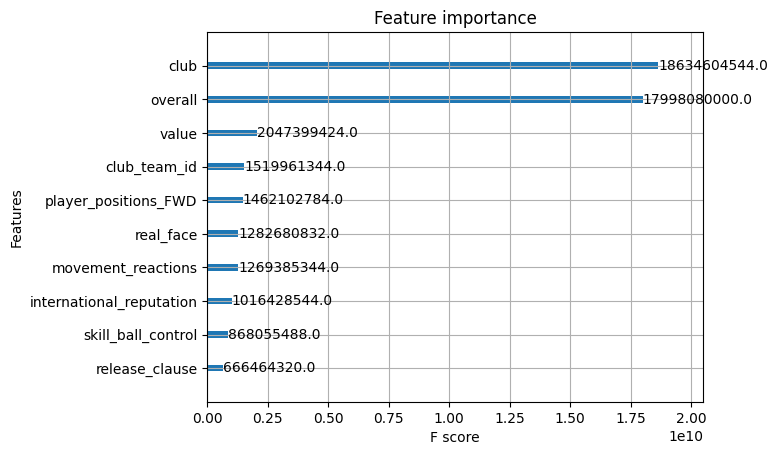

In [230]:
# XGBoost feature importance visualization
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()

## Only Numerical Features

In [152]:
num = fifa_df.select_dtypes(include=['number']).reset_index(drop=True)
util.print(num)

,overall,potential,value,wage,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,30.0,2023.0,52,1369.0,10.0,4,4,5,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,9.0,2023.0,37,1353.0,9.0,4,4,5,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,7.0,2023.0,38,1354.0,7.0,4,5,5,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,10.0,2025.0,54,NaN,NaN,5,5,5,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,17.0,2025.0,7,1325.0,7.0,5,4,4,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,36.0,2021.0,155,NaN,NaN,3,2,1,114000.0,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN
19235,47,59,110000.0,500.0,19,175,70,445.0,1.0,27.0,2021.0,25,NaN,NaN,3,2,1,193000.0,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN
19236,47,55,100000.0,500.0,21,178,72,111131.0,1.0,31.0,2021.0,25,NaN,NaN,3,2,1,175000.0,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN
19237,47,60,110000.0,500.0,19,173,66,111131.0,1.0,12.0,2021.0,25,NaN,NaN,3,2,1,239000.0,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN


In [156]:
# Check for infinate values
num.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill missing values with mean column values in the train set
num.fillna(0, inplace=True)

In [157]:
# Prepare X and y
X, y = num.drop(['overall', 'potential', 'value', 'release_clause', 'wage'],
                axis=1).copy().reset_index(drop=True), num['wage'].copy().reset_index(drop=True)

In [158]:
# Get the most important features by permutation importance
from sklearn.inspection import permutation_importance
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# get the score
score = model.score(X_test, y_test)
print(score)

0.879509808446282


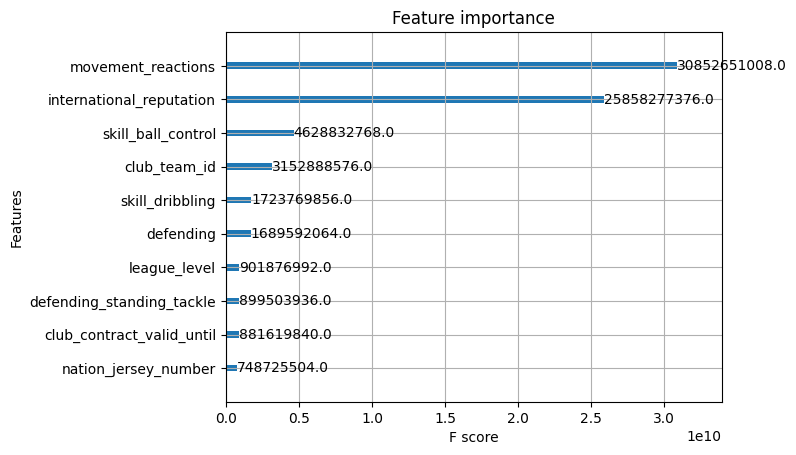

In [159]:
# XGBoost feature importance visualization
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()

In [160]:
# Get the 20 most important features
importance = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
32,movement_reactions,0.355080
12,international_reputation,0.297600
28,skill_ball_control,0.053273
3,club_team_id,0.036286
24,skill_dribbling,0.019839
...,...,...
29,movement_acceleration,0.002222
23,attacking_volleys,0.001691
38,power_long_shots,0.001535
42,mentality_vision,0.001523


In [161]:
# Plot the feature importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.2260 ± 0.0116,movement_reactions
0.2133 ± 0.0157,club_team_id
0.0384 ± 0.0020,international_reputation
0.0380 ± 0.0022,skill_ball_control
0.0261 ± 0.0284,age
0.0184 ± 0.0025,defending
0.0121 ± 0.0039,attacking_crossing
0.0115 ± 0.0033,league_level
0.0082 ± 0.0079,club_contract_valid_until
0.0078 ± 0.0016,attacking_short_passing


In [162]:
# X = X.fillna(X.mean())
fit = sm.OLS(y, X).fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              645.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:11:32   Log-Likelihood:                     -2.0919e+05
No. Observations:               19239   AIC:                                  4.185e+05
Df Residuals:                   19185   BIC:                                  4.189e+05
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
age                          -587.0967     26.954    -21.782      0.000    -639.928    -534.265
height_cm                    -389.0231     13.650    -28.499      0.000    -415.779    -362.267
weight_kg                      33.4843     23.498      1.425      0.154     -12.573      79.542
club_team_id                   -0.0323      0.002    -17.079      0.000      -0.036      -0.029
league_level                 -462.3887    135.964     -3.401      0.001    -728.890    -195.888
club_jersey_number             -8.4666      5.397     -1.569      0.117     -19.046       2.113
club_contract_valid_until       5.8996      0.801      7.367      0.000       4.330       7.469
nationality_id                  8.6527      2.077      4.166      0.000       4.582      12.724
nation_team_id                 -0.0268      0.013     -2.073      0.038      -0.052      -0.001
nation_jersey_number          648.6779     36.488     17.778      0.000     577.159     720.197
weak_foot                    -122.6458    150.830     -0.813      0.416    -418.286     172.994
skill_moves                  1567.5690    220.875      7.097      0.000    1134.634    2000.504
international_reputation     2.695e+04    288.622     93.363      0.000    2.64e+04    2.75e+04
pace                          148.7632    224.000      0.664      0.507    -290.297     587.823
shooting                     -155.8395    124.288     -1.254      0.210    -399.455      87.776
passing                      -122.9249     70.633     -1.740      0.082    -261.372      15.522
dribbling                     109.2360    102.871      1.062      0.288     -92.399     310.871
defending                     -58.6457    117.050     -0.501      0.616    -288.073     170.782
physic                        -96.2571     45.105     -2.134      0.033    -184.666      -7.848
attacking_crossing             73.6867     18.975      3.883      0.000      36.494     110.880
attacking_finishing           116.3191     57.415      2.026      0.043       3.781     228.857
attacking_heading_accuracy    137.3325     17.973      7.641      0.000     102.104     172.561
attacking_short_passing        85.0347     30.499      2.788      0.005      25.253     144.816
attacking_volleys             -11.9906     15.761     -0.761      0.447     -42.883      18.902
skill_dribbling               -61.1110     49.967     -1.223      0.221    -159.051      36.829
skill_curve                    24.6675     14.503      1.701      0.089      -3.760      53.095
skill_fk_accuracy              10.2519     12.919      0.794      0.427     -15.071      35.575
skill_long_passing             17.6180     20.370      0.865      0.387     -22.309      57.545
skill_ba